Задание 1

In [13]:
import pandas as pd

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Вывод первых 5 строк для проверки
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

Задание 2

In [14]:
import pandas as pd

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Расчет основных статистик для числовых столбцов
statistics = df.describe()

# Вывод статистики
print(statistics)

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

Задание 3

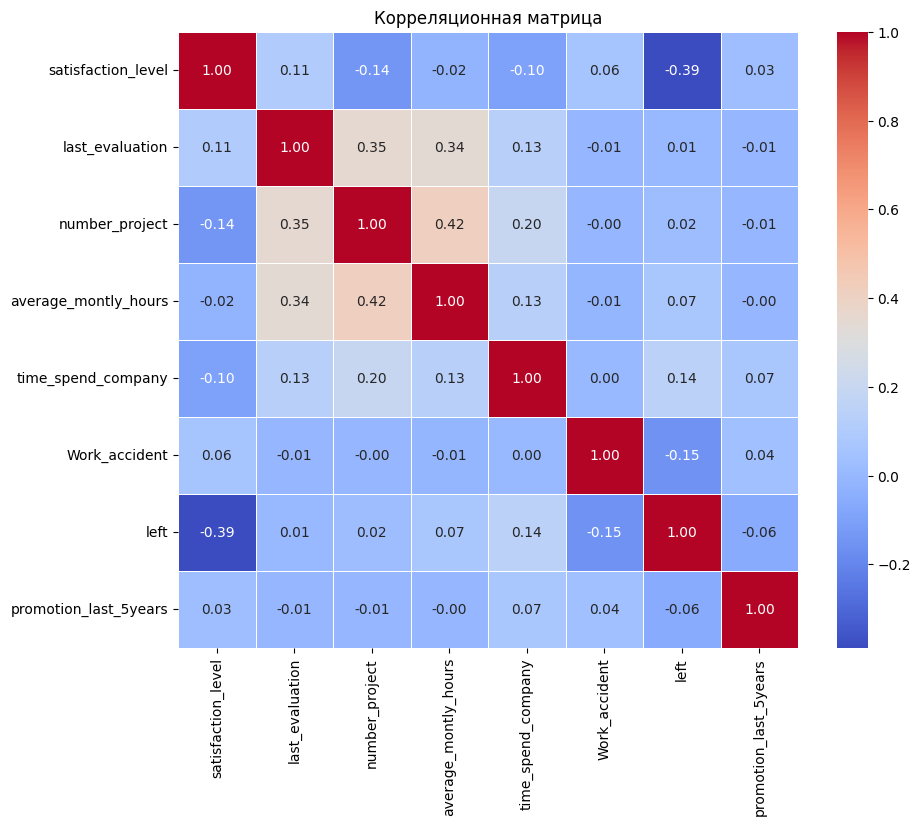

Самые скоррелированные переменные: 1.0
Наименее скоррелированные переменные: -0.3883749834241161


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Расчет корреляционной матрицы
correlation_matrix = numeric_columns.corr()

# Визуализация корреляционной матрицы с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
# Для этого найдем максимальное и минимальное значения корреляции (исключая диагональ, где корреляция равна 1)
corr_values = correlation_matrix.unstack()
corr_values = corr_values.sort_values(kind="quicksort")

# Самые скоррелированные переменные (исключая корреляцию переменной с самой собой)
most_correlated = corr_values.iloc[-2]
print(f'Самые скоррелированные переменные: {most_correlated}')

# Наименее скоррелированные переменные
least_correlated = corr_values.iloc[0]
print(f'Наименее скоррелированные переменные: {least_correlated}')

Задание 4

In [23]:
import pandas as pd

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Подсчет количества сотрудников в каждом департаменте
department_counts = df['department'].value_counts()

# Вывод результатов
print(department_counts)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


Задание 5

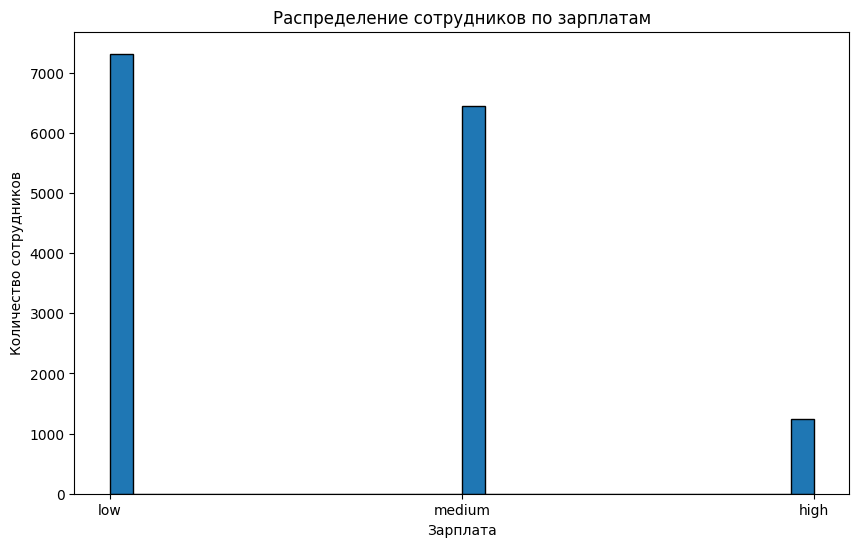

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Построение гистограммы распределения сотрудников по зарплатам
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=30, edgecolor='black')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

Задание 6

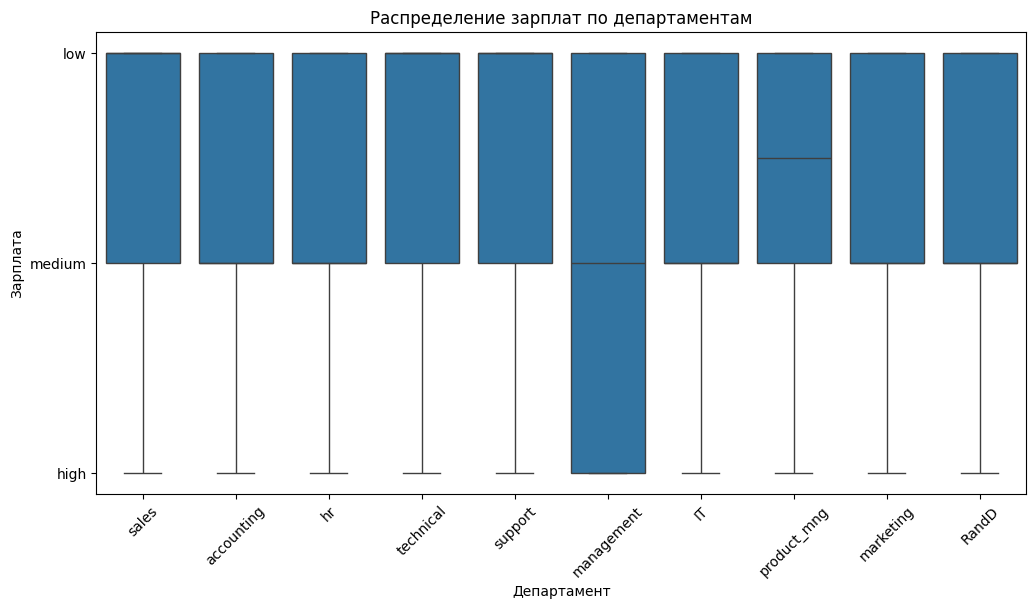

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Построение boxplot для распределения зарплат по департаментам
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='salary', data=df)
plt.title('Распределение зарплат по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.show()

Задание 7

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Разделение сотрудников на группы по уровню зарплаты
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

# Выборка времени, проведенного на работе, для каждой группы
high_salary_hours = high_salary['average_montly_hours']
low_salary_hours = low_salary['average_montly_hours']

# Проведение t-теста Стьюдента
t_stat, p_value = ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)

# Вывод результатов
print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, подтверждается.")
else:
    print("Гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, не подтверждается.")

T-статистика: -0.7624331665385475
P-значение: 0.4459045542257889
Гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, не подтверждается.


Задание 8

In [26]:
import pandas as pd

# Загрузка файла HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# Группировка данных по признаку увольнения (left)
grouped = df.groupby('left')

# Расчет показателей для уволившихся и не уволившихся сотрудников
results = grouped.agg({
    'promotion_last_5years': ['mean'],  # Доля сотрудников с повышением за последние 5 лет
    'satisfaction_level': ['mean'],      # Средняя степень удовлетворенности
    'number_project': ['mean']           # Среднее количество проектов
})

# Переименование столбцов для удобства чтения
results.columns = ['Promotion Rate', 'Average Satisfaction', 'Average Projects']

# Вывод результатов
print(results)

      Promotion Rate  Average Satisfaction  Average Projects
left                                                        
0           0.026251              0.666810          3.786664
1           0.005321              0.440098          3.855503


Задание 9

Точность модели: 0.75
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



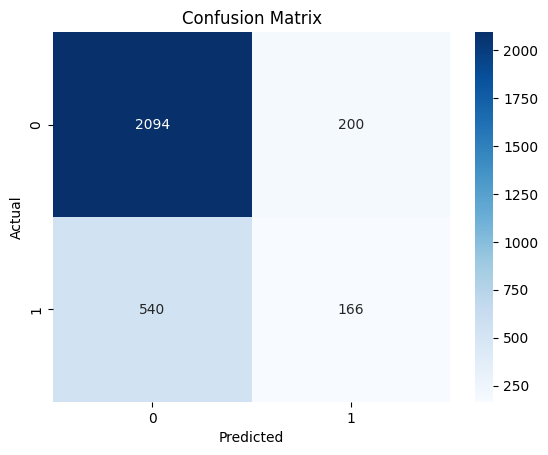

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('HR.csv')

# Удаление столбцов department и salary
df = df.drop(['department', 'salary'], axis=1)

# Разделение на признаки (features) и целевую переменную (target)
X = df.drop('left', axis=1)  # Все столбцы, кроме 'left'
y = df['left']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Отчет по классификации
print(classification_report(y_test, y_pred))

# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()